In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [27]:
# Setting up the input directory
input_dir = 'Industrial-Equipment/'

# Function to load images and labels
def load_images_and_labels(input_dir):
    images = []
    labels = []

    for class_label, class_name in enumerate(os.listdir(input_dir)):
        class_path = os.path.join(input_dir, class_name)

        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)

            # Read and preprocess the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
            image = tf.keras.preprocessing.image.img_to_array(image)
            image /= 255.0  # Normalize pixel values

            images.append(image)
            labels.append(class_label)

    return np.array(images), np.array(labels)

In [28]:
# Load images and labels
X, y = load_images_and_labels(input_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Define the CNN architecture
model = models.Sequential()

# Adding layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 128)        

In [30]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0:
        return lr * 0.5
    else:
        return lr

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
110/110 [==============================] - 8s 64ms/step - loss: 0.5317 - accuracy: 0.6974 - val_loss: 0.4204 - val_accuracy: 0.7355
Epoch 2/10
110/110 [==============================] - 7s 64ms/step - loss: 0.3582 - accuracy: 0.8162 - val_loss: 0.2619 - val_accuracy: 0.8978
Epoch 3/10
110/110 [==============================] - 7s 64ms/step - loss: 0.2368 - accuracy: 0.9014 - val_loss: 0.1751 - val_accuracy: 0.9387
Epoch 4/10
110/110 [==============================] - 7s 61ms/step - loss: 0.1773 - accuracy: 0.9256 - val_loss: 0.4360 - val_accuracy: 0.8320
Epoch 5/10
110/110 [==============================] - 7s 60ms/step - loss: 0.1631 - accuracy: 0.9295 - val_loss: 0.2671 - val_accuracy: 0.8967
Epoch 6/10
110/110 [==============================] - 7s 60ms/step - loss: 0.1595 - accuracy: 0.9338 - val_loss: 0.1237 - val_accuracy: 0.9478
Epoch 7/10
110/110 [==============================] - 7s 60ms/step - loss: 0.1364 - accuracy: 0.9474 - val_loss: 0.1165 - val_accuracy: 0.9489

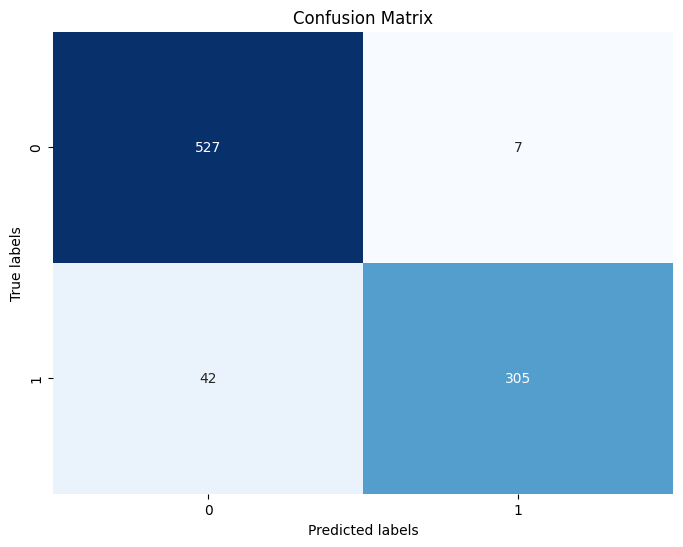

In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Manually test the model
def manual_test(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class, img_array[0] 

1/1 [==============================] - 0s 82ms/step


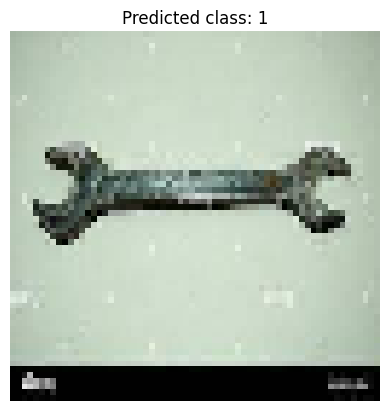

In [34]:
# Example usage of manual_test function
image_path = 'example_equipment3.jpeg'
predicted_class, example_image = manual_test(image_path)

# Display the example image
plt.imshow(example_image)
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 27ms/step


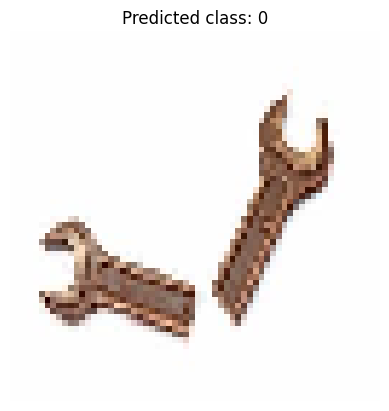

In [35]:
# Example usage of manual_test function
image_path = 'example_equipment.jpeg'
predicted_class, example_image = manual_test(image_path)

# Display the example image
plt.imshow(example_image)
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()